In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import *
import seaborn as sns

In [ ]:
data_path = "/content/drive/MyDrive/SE355/DoAn/Data/"

In [ ]:
weather_path = data_path + "weather_data.csv"
weather_df = pd.read_csv(weather_path)
weather_df.head(24)

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,rain,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,predict_rain,predict_cloud,predict_heat
0,2020-01-01 00:00:00,25.789500,62.117640,17.989500,27.167923,0.0,1015.0,1012.91455,25.500002,0.0,0.0,85.0,10.464797,20.991426,26.564985,30.963696,17.640000,0,0,0
1,2020-01-01 01:00:00,25.089500,64.148026,17.839500,26.513945,0.0,1014.5,1012.41090,27.000002,0.0,0.0,90.0,9.693296,20.188908,21.801476,31.138918,14.759999,0,0,0
2,2020-01-01 02:00:00,24.439499,65.232490,17.489500,25.661043,0.0,1014.1,1012.00684,26.100000,0.0,0.0,87.0,10.028439,21.120682,21.037588,29.623667,14.400000,0,0,0
3,2020-01-01 03:00:00,23.939499,67.643974,17.589500,25.039515,0.0,1013.6,1011.50440,17.700000,0.0,0.0,59.0,11.165805,23.042812,20.772345,28.967560,15.840000,0,0,0
4,2020-01-01 04:00:00,23.589500,70.623375,17.939499,24.783075,0.0,1013.4,1011.30270,25.500002,0.0,0.0,85.0,11.592895,23.773632,25.769283,32.005356,16.560000,0,0,0
5,2020-01-01 05:00:00,23.289500,72.139534,17.989500,24.505810,0.0,1013.8,1011.69965,22.500000,0.0,0.0,75.0,11.592895,23.773632,25.769283,32.005356,16.560000,0,0,0
6,2020-01-01 06:00:00,22.989500,73.691110,18.039500,24.134232,0.0,1014.2,1012.09656,23.100000,0.0,0.0,77.0,12.240000,24.766848,28.072395,32.535050,17.640000,0,0,0
7,2020-01-01 07:00:00,24.039500,71.374520,18.539500,25.566103,0.0,1015.3,1013.20184,24.000000,0.0,0.0,80.0,11.183201,23.400000,33.178535,36.869990,18.000000,0,0,0
8,2020-01-01 08:00:00,25.839500,64.712620,18.689499,26.984768,0.0,1016.1,1014.01263,9.000000,0.0,0.0,30.0,14.264361,19.881649,47.045418,47.935760,24.119999,0,0,0
9,2020-01-01 09:00:00,27.689499,58.037663,18.689499,29.050800,0.0,1016.4,1014.32510,5.400000,0.0,0.0,18.0,12.768586,16.087610,49.574005,49.537850,25.560000,0,0,0


In [ ]:
weather_df["day"] = weather_df["date"].apply(lambda x: datetime.fromisoformat(x).day)
weather_df["month"] = weather_df["date"].apply(lambda x: datetime.fromisoformat(x).month)
weather_df["year"] = weather_df["date"].apply(lambda x: datetime.fromisoformat(x).year)
weather_df["hour"] = weather_df["date"].apply(lambda x: datetime.fromisoformat(x).hour)

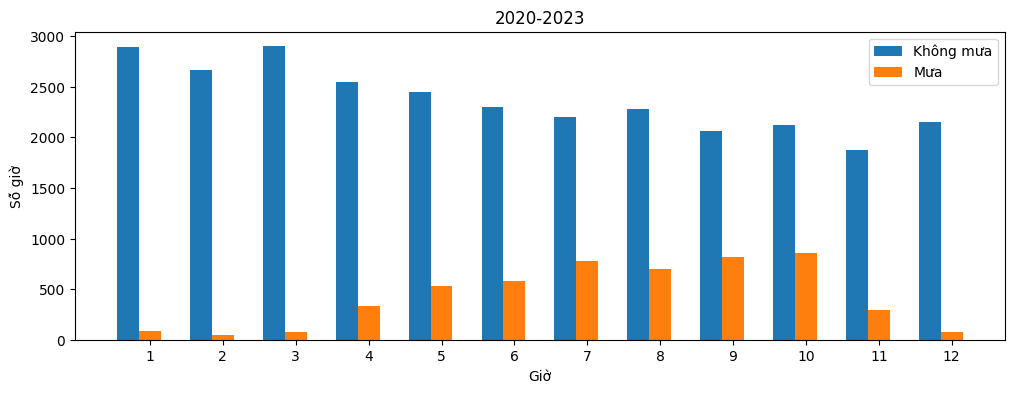

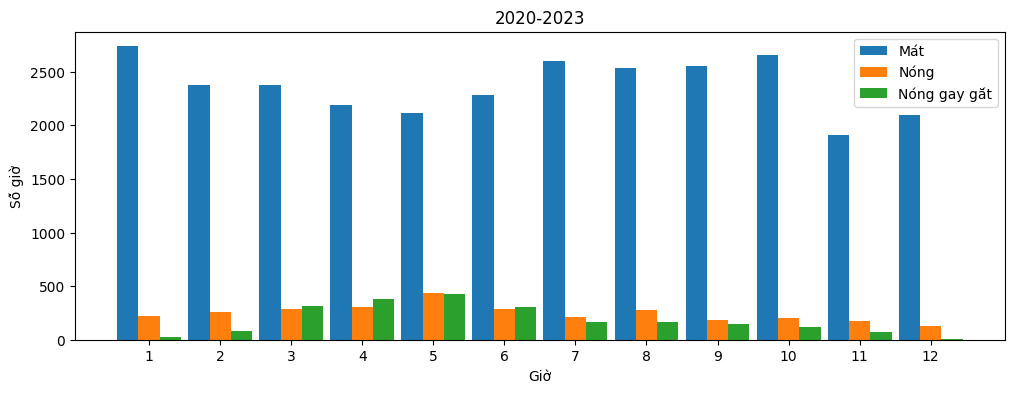

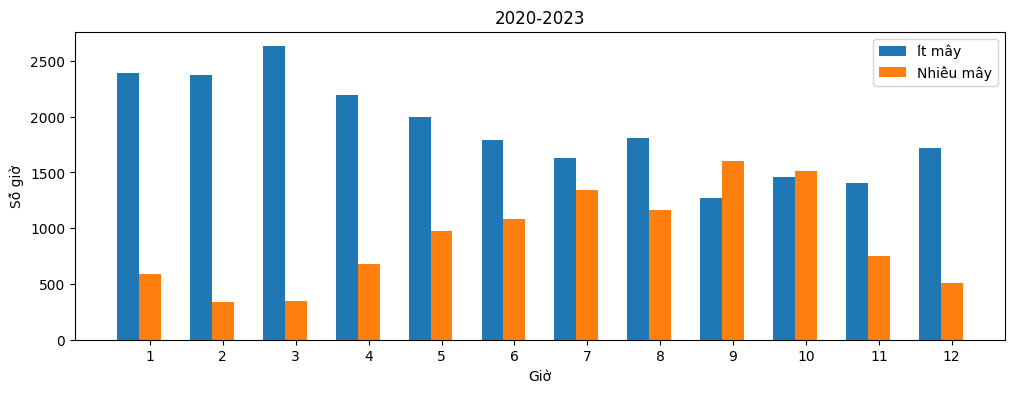

In [ ]:
def monthly_years_plot_labels(df, predict_labels, classes, title):
  label_counts = [[] for _ in range(np.unique(df[predict_labels]).shape[0])]
  hours = np.unique(df["month"])
  for i, hour in enumerate(hours):
    hour_df = df[df["month"] == hour]
    labels, counts = np.unique(hour_df[predict_labels], return_counts=True)
    for label in labels:
      label_counts[label].append(counts[label])
    for j in range(len(label_counts)):
      if len(label_counts[j]) != i+1:
        label_counts[j].append(0)

  idx = np.arange(1, len(hours)+1)
  width = 0.3

  fig = plt.subplots(figsize= (12, 4))
  for i, l in enumerate(label_counts):
    plt.bar(idx + width*i, l, width, linewidth=3)

  plt.xlabel("Giờ")
  plt.ylabel("Số giờ")
  plt.title(title)
  plt.xticks(idx + width, hours)
  plt.legend(classes)
  plt.show()
  print()

pred_labels = ["predict_rain", "predict_heat", "predict_cloud"]
classes = [["Không mưa", "Mưa"],
           ["Mát", "Nóng", "Nóng gay gắt"],
           ["Ít mây", "Nhiều mây"]]
for pred, cla in zip(pred_labels, classes):
  monthly_years_plot_labels(weather_df, pred, cla, "2020-2023")

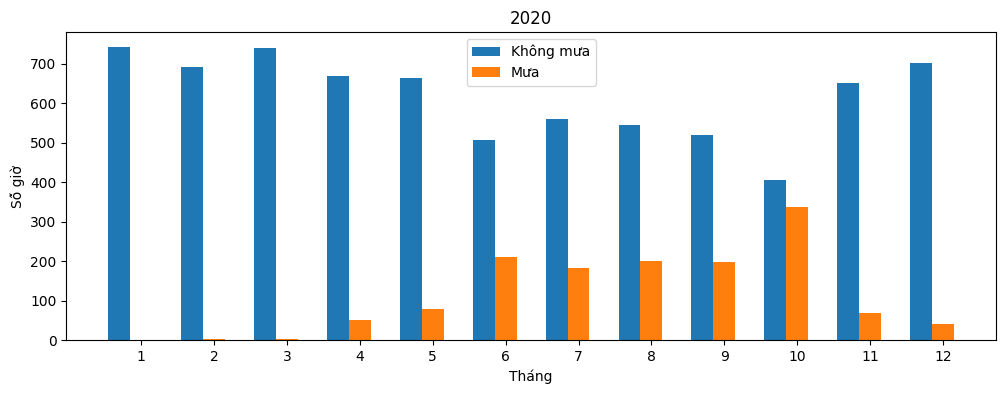

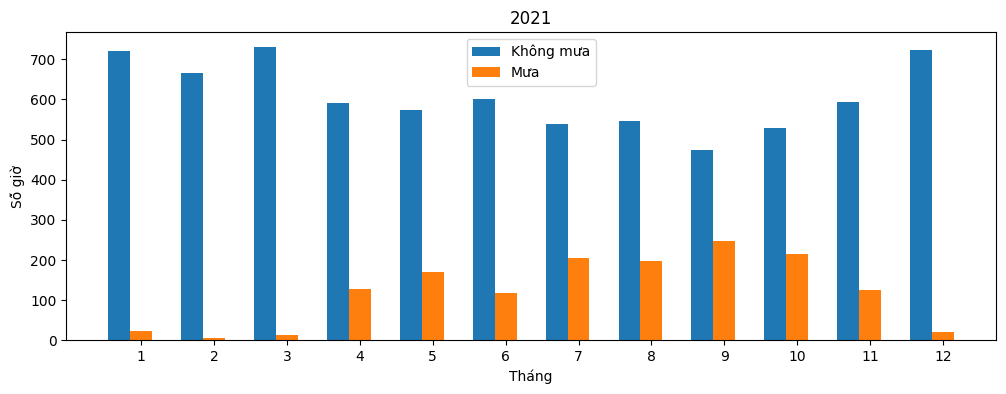

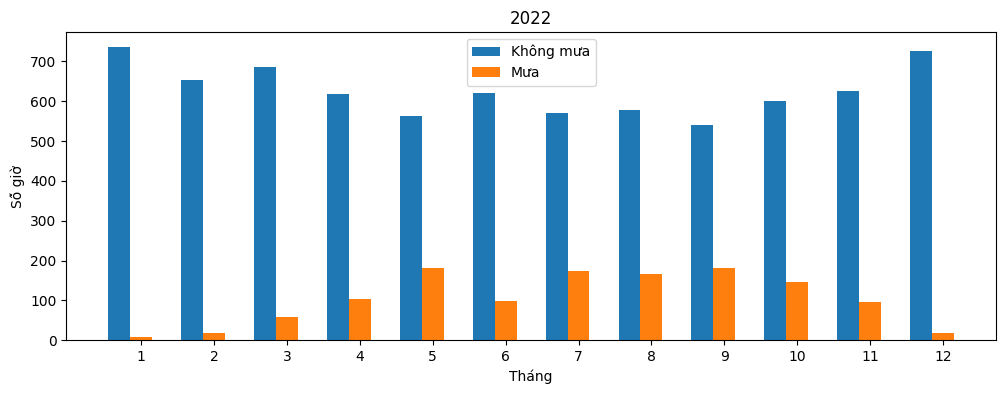

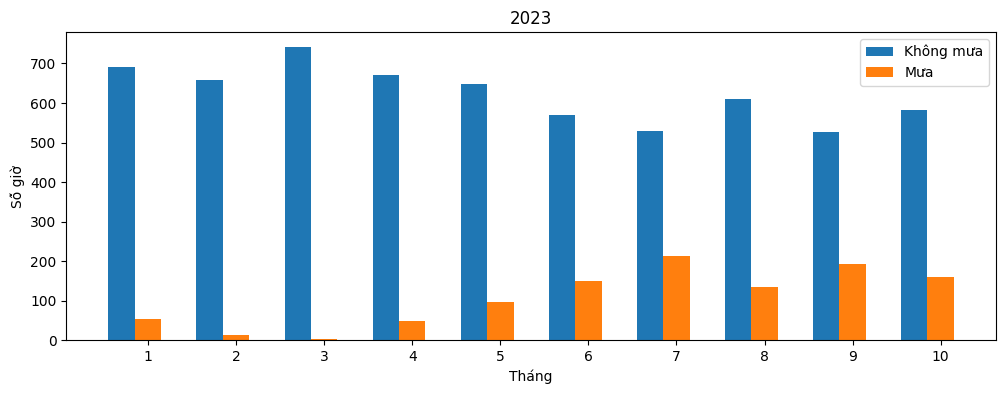

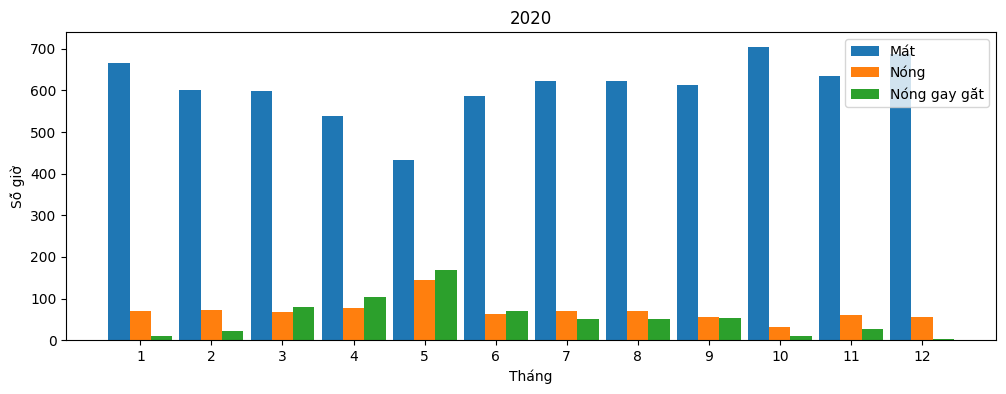

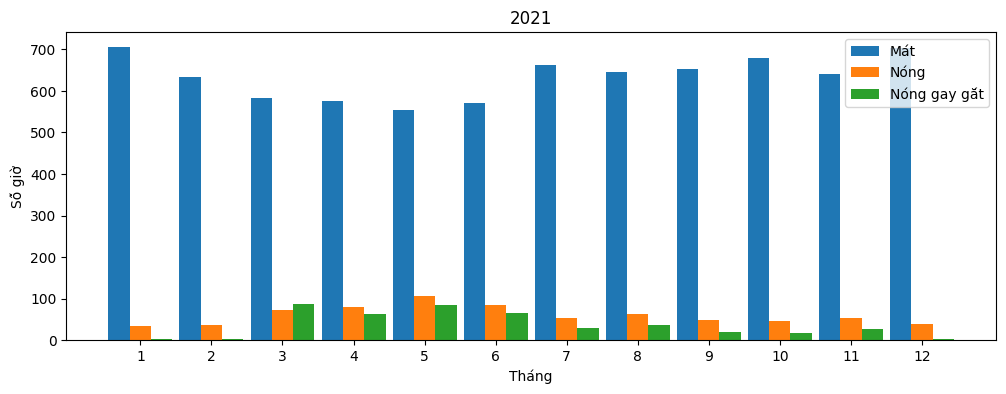

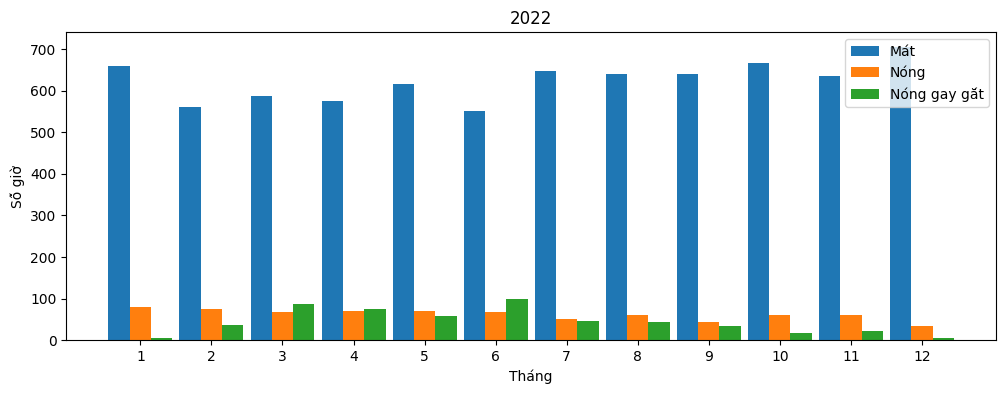

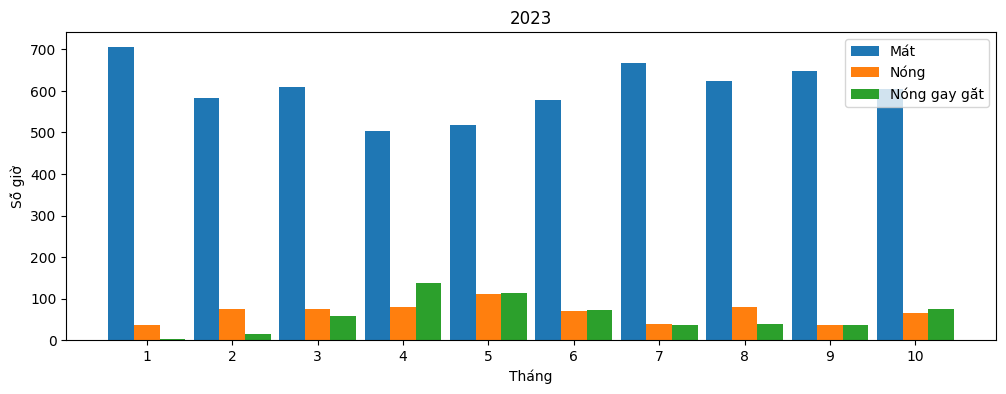

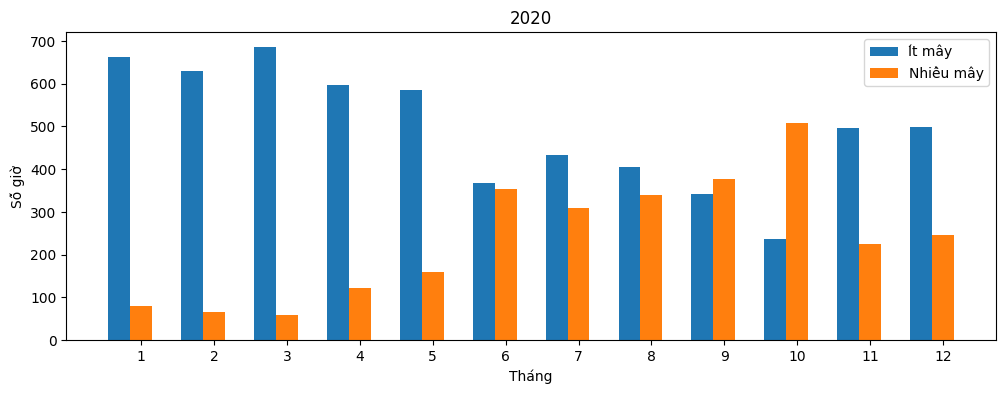

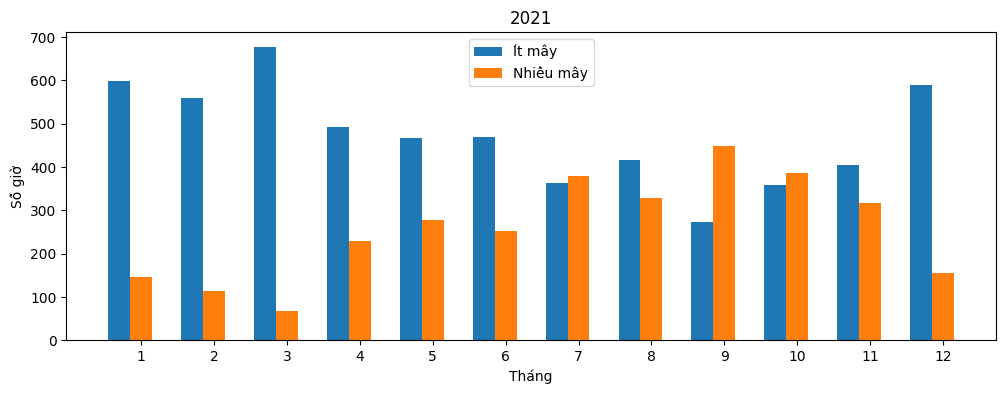

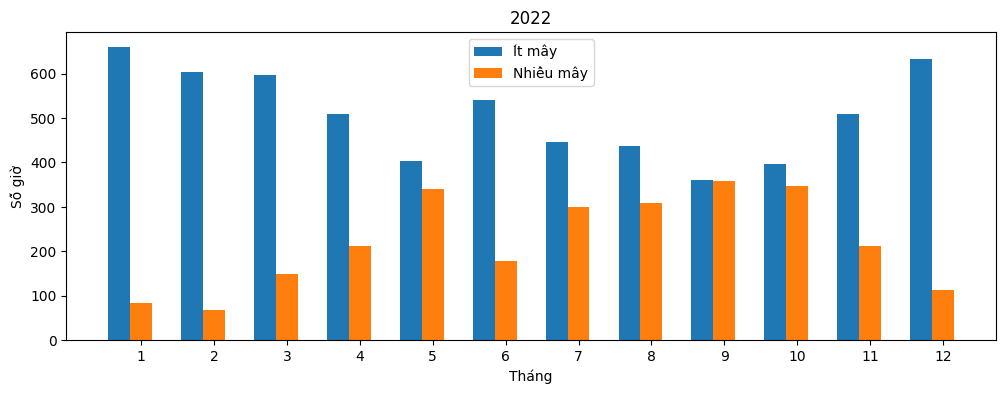

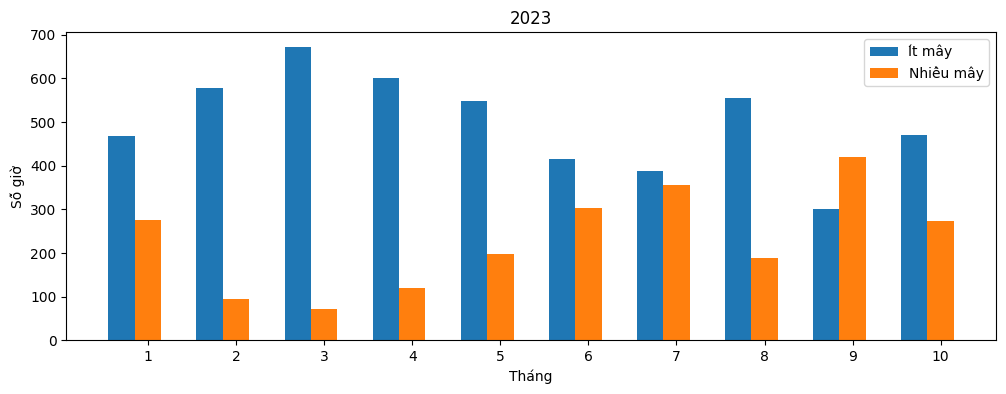

In [ ]:
def monthly_plot_labels(df, predict_labels, classes):
  for year in np.unique(df["year"]):
    year_df = weather_df[weather_df["year"] == year]
    label_counts = [[] for _ in range(np.unique(weather_df[predict_labels]).shape[0])]
    months = np.unique(year_df["month"])
    for month in months:
      month_df = year_df[year_df["month"] == month]
      labels, counts = np.unique(month_df[predict_labels], return_counts=True)
      for label in labels:
        label_counts[label].append(counts[label])

    idx = np.arange(1, len(months)+1)
    width = 0.3

    fig = plt.subplots(figsize= (12, 4))
    for i, l in enumerate(label_counts):
      plt.bar(idx + width*i, l, width, linewidth=3)

    plt.xlabel("Tháng")
    plt.ylabel("Số giờ")
    plt.title(year)
    plt.xticks(idx + width, months)
    plt.legend(classes)
    plt.show()
    print()

pred_labels = ["predict_rain", "predict_heat", "predict_cloud"]
classes = [["Không mưa", "Mưa"],
           ["Mát", "Nóng", "Nóng gay gắt"],
           ["Ít mây", "Nhiều mây"]]
for pred, cla in zip(pred_labels, classes):
  monthly_plot_labels(weather_df, pred, cla)

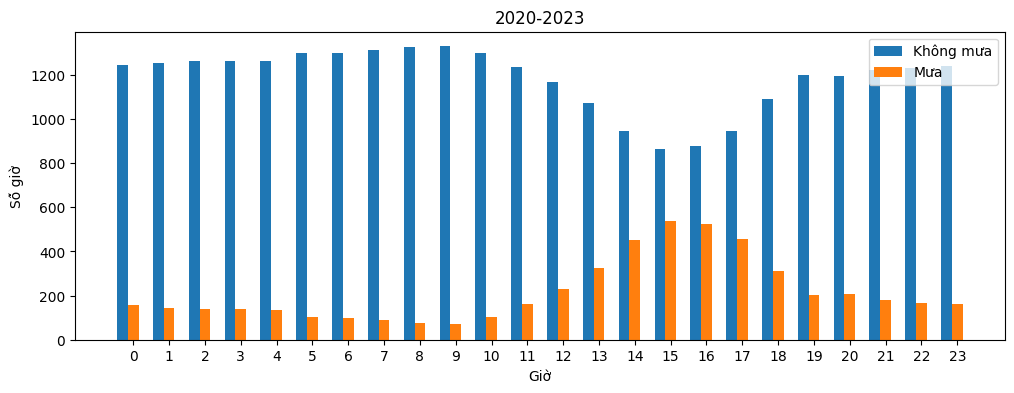

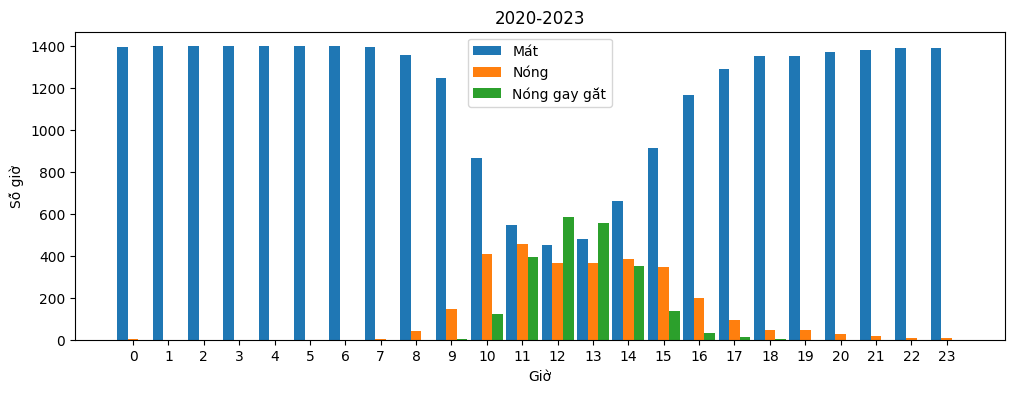

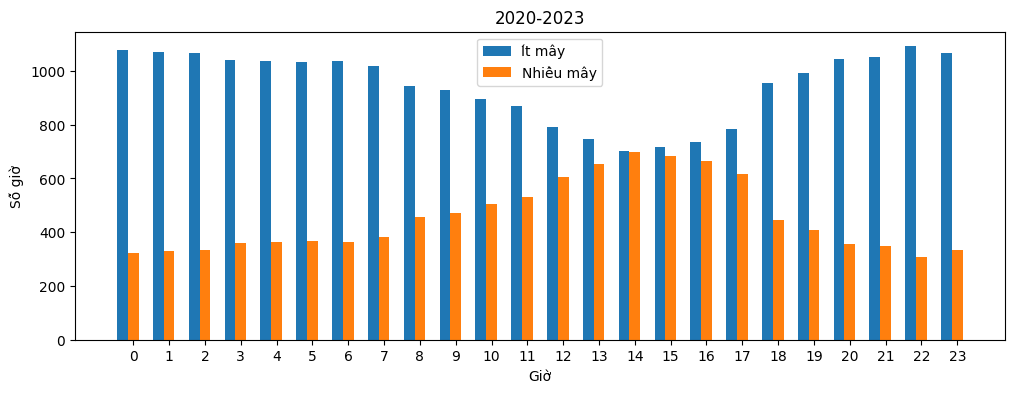

In [ ]:
def hourly_years_plot_labels(df, predict_labels, classes, title):
  label_counts = [[] for _ in range(np.unique(df[predict_labels]).shape[0])]
  hours = np.unique(df["hour"])
  for i, hour in enumerate(hours):
    hour_df = df[df["hour"] == hour]
    labels, counts = np.unique(hour_df[predict_labels], return_counts=True)
    for label in labels:
      label_counts[label].append(counts[label])
    for j in range(len(label_counts)):
      if len(label_counts[j]) != i+1:
        label_counts[j].append(0)

  idx = np.arange(1, len(hours)+1)
  width = 0.3

  fig = plt.subplots(figsize= (12, 4))
  for i, l in enumerate(label_counts):
    plt.bar(idx + width*i, l, width, linewidth=3)

  plt.xlabel("Giờ")
  plt.ylabel("Số giờ")
  plt.title(title)
  plt.xticks(idx + width, hours)
  plt.legend(classes)
  plt.show()
  print()

pred_labels = ["predict_rain", "predict_heat", "predict_cloud"]
classes = [["Không mưa", "Mưa"],
           ["Mát", "Nóng", "Nóng gay gắt"],
           ["Ít mây", "Nhiều mây"]]
for pred, cla in zip(pred_labels, classes):
  hourly_years_plot_labels(weather_df, pred, cla, "2020-2023")

24
24


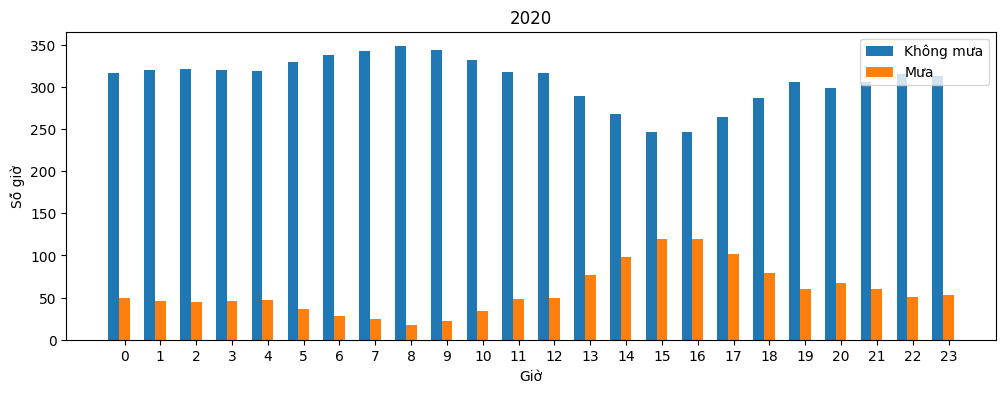


24
24


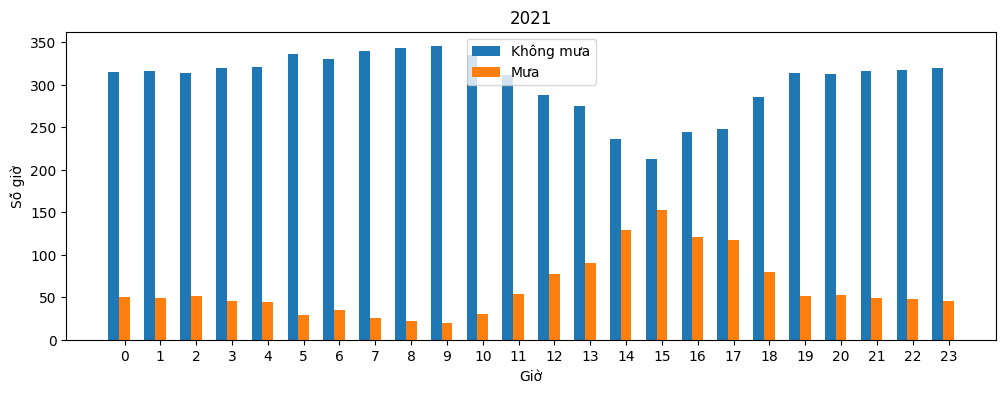


24
24


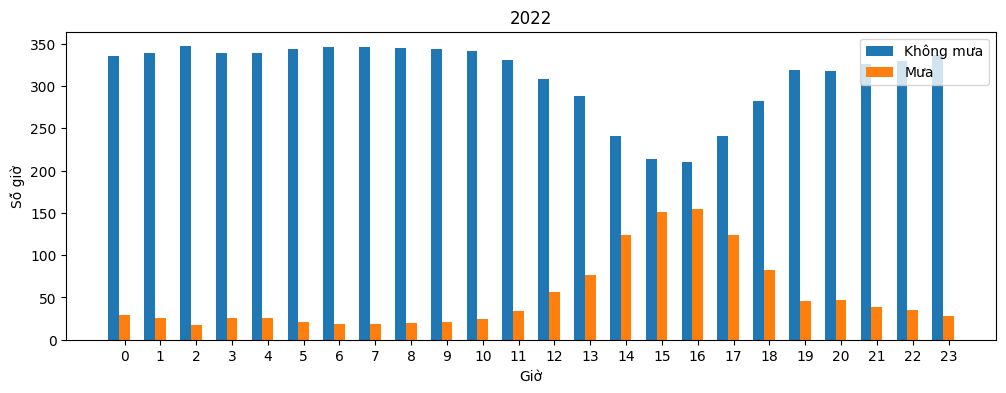


24
24


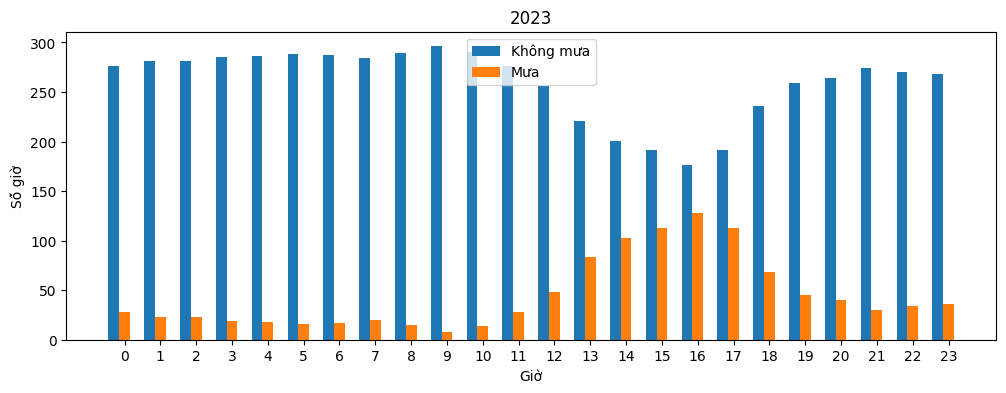


24
24
24


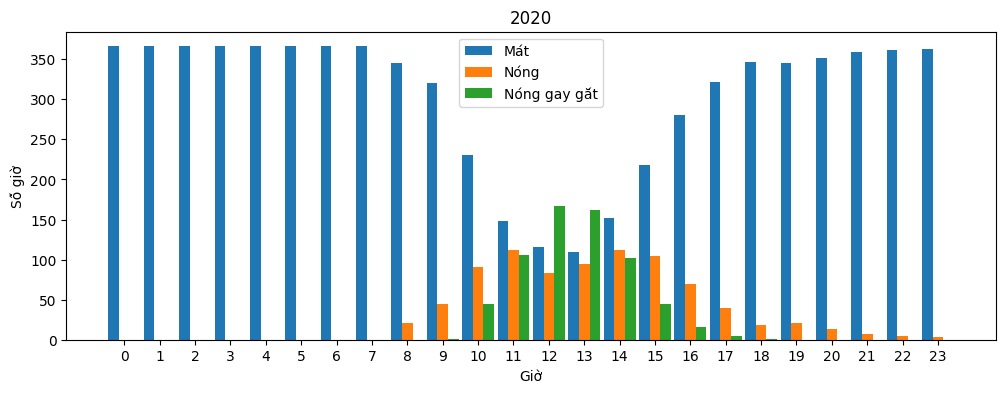


24
24
24


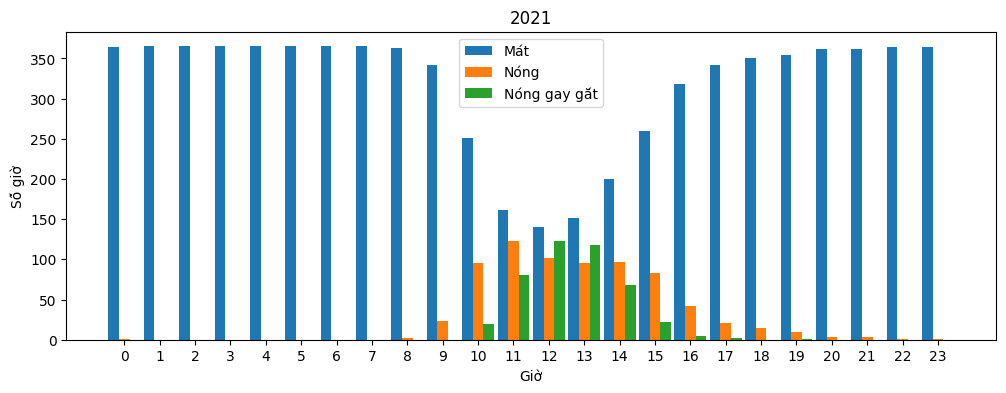


24
24
24


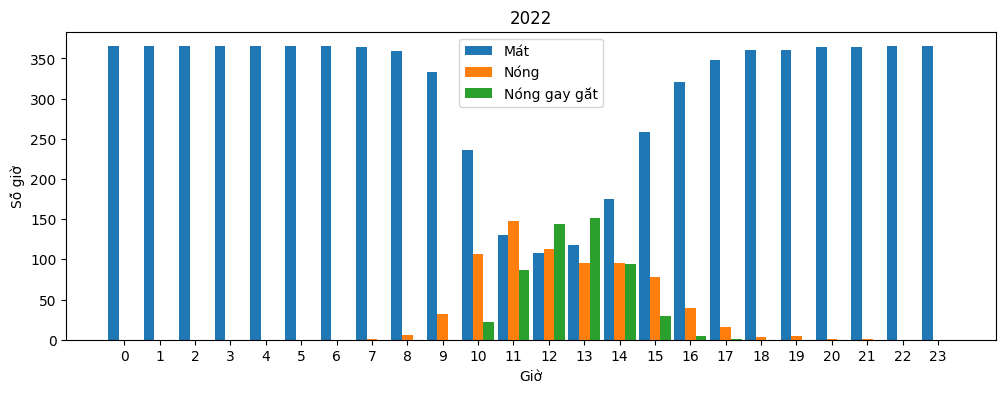


24
24
24


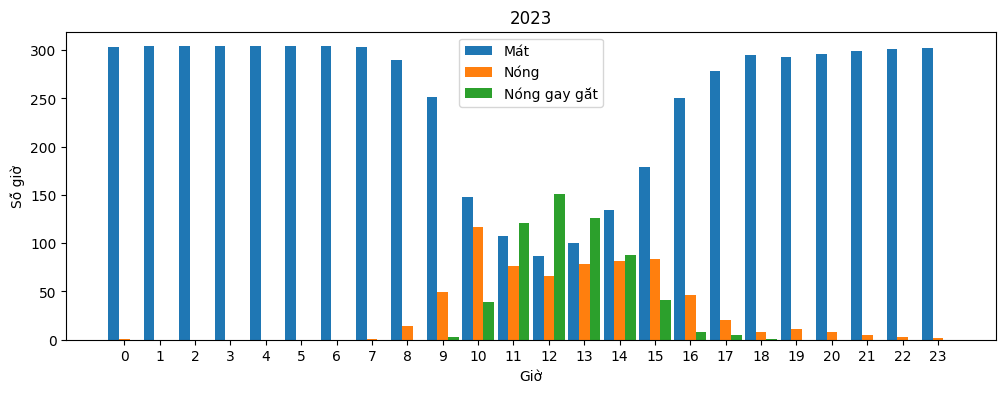


24
24


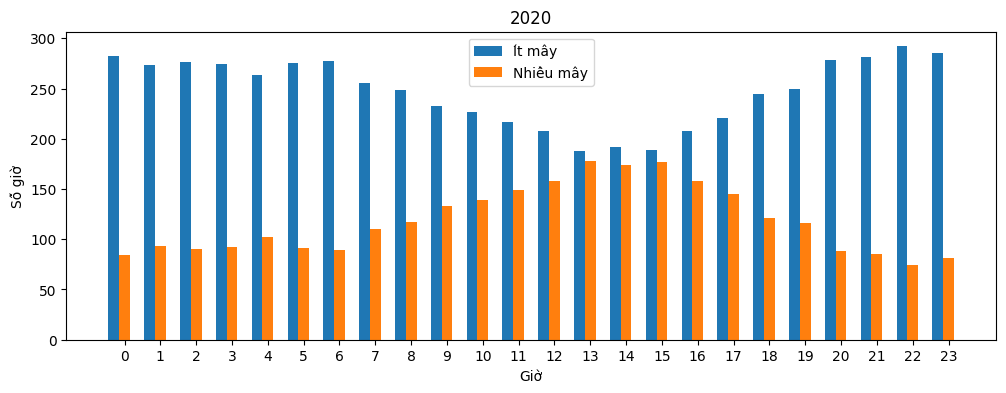


24
24


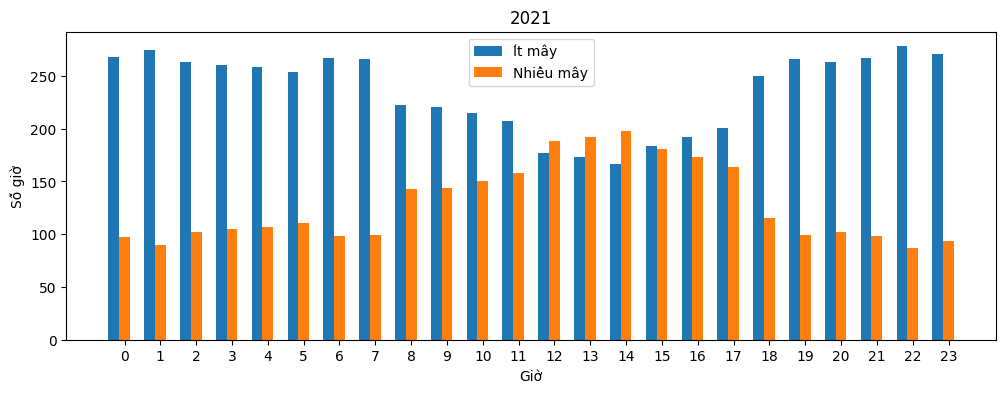


24
24


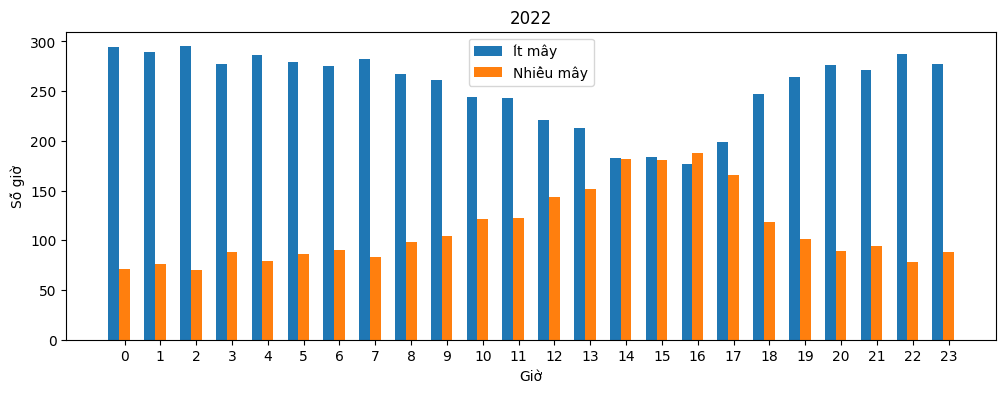


24
24


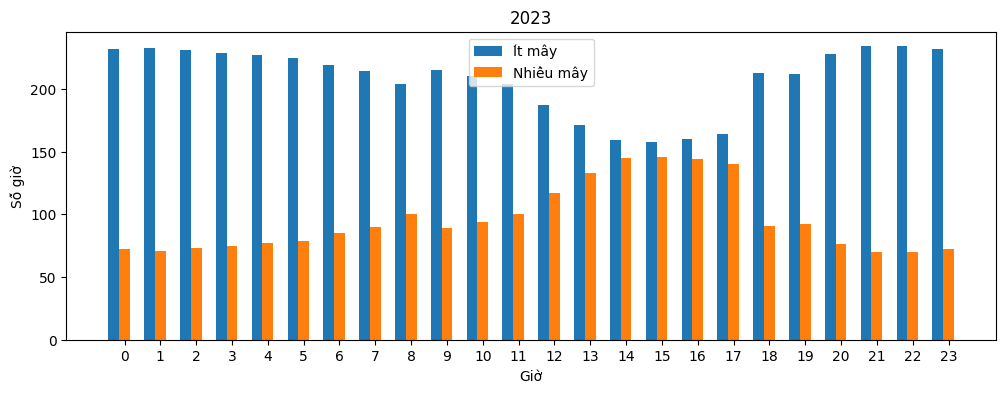

In [ ]:
def hourly_plot_labels(df, predict_labels, classes):
  for year in np.unique(df["year"]):
    year_df = df[df["year"] == year]
    label_counts = [[] for _ in range(np.unique(df[predict_labels]).shape[0])]
    hours = np.unique(year_df["hour"])
    for i, hour in enumerate(hours):
      hour_df = year_df[year_df["hour"] == hour]
      labels, counts = np.unique(hour_df[predict_labels], return_counts=True)
      for label in labels:
        label_counts[label].append(counts[label])
      for j in range(len(label_counts)):
        if len(label_counts[j]) != i+1:
          label_counts[j].append(0)

    idx = np.arange(1, len(hours)+1)
    width = 0.3

    for l in label_counts:
      print(len(l))

    fig = plt.subplots(figsize= (12, 4))
    for i, l in enumerate(label_counts):
      plt.bar(idx + width*i, l, width, linewidth=3)

    plt.xlabel("Giờ")
    plt.ylabel("Số giờ")
    plt.title(year)
    plt.xticks(idx + width, hours)
    plt.legend(classes)
    plt.show()
    print()

pred_labels = ["predict_rain", "predict_heat", "predict_cloud"]
classes = [["Không mưa", "Mưa"],
           ["Mát", "Nóng", "Nóng gay gắt"],
           ["Ít mây", "Nhiều mây"]]
for pred, cla in zip(pred_labels, classes):
  hourly_plot_labels(weather_df, pred, cla)